<a href="https://colab.research.google.com/github/Guillem96/efficientdet-tf/blob/master/examples/EfficientDet_TF_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/Guillem96/efficientdet-tf
!wget -O sample.jpg https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSRcGUTmpIASquxz8ocDSzHMTzseDg5eH_1l_UOsli1ENbkvAOX&usqp=CAU

  Cloning https://github.com/Guillem96/efficientdet-tf to /tmp/pip-req-build-1qor08jm
  Running command git clone -q https://github.com/Guillem96/efficientdet-tf /tmp/pip-req-build-1qor08jm
  Created wheel for efficientdet: filename=efficientdet-0.1-cp36-none-any.whl size=46524 sha256=6b3d0002666d435d7f850c347a7ed501a267b4451279d10686df650914ecad1c
  Stored in directory: /tmp/pip-ephem-wheel-cache-rd1lb4ni/wheels/db/87/76/192b8b645e1cb455fa7f38d3790779111aee7fd0635270bffc
Successfully built efficientdet
--2020-04-10 15:17:46--  https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSRcGUTmpIASquxz8ocDSzHMTzseDg5eH_1l_UOsli1ENbkvAOX
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 172.217.212.100, 172.217.212.102, 172.217.212.101, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|172.217.212.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5255 (5.1K) [image/jpeg]
Saving to: ‘sample.jpg’

sample.jpg          100%[

In [0]:
from efficientdet import EfficientDet
from efficientdet.data import preprocess
from efficientdet.utils.io import load_image
from efficientdet.data.voc import IDX_2_LABEL

import tensorflow as tf
from PIL import Image, ImageDraw

In [3]:
model = EfficientDet.from_pretrained('D0-VOC', score_threshold=.3)
image_size = (model.config.input_size,) * 2

Loading model weights from /root/.effdet-checkpoints/model.tf...


In [4]:
image = load_image('sample.jpg', image_size)
image.shape

TensorShape([512, 512, 3])

In [0]:
n_image = preprocess.normalize_image(image)
n_image = tf.expand_dims(n_image, 0)

In [0]:
predictions = model(n_image, training=False)

In [0]:
boxes, labels, _ = predictions
boxes = boxes[0].numpy().astype('int32').tolist()
labels = labels[0].numpy().tolist()
labels = [IDX_2_LABEL[o] for o in labels]

['cat']


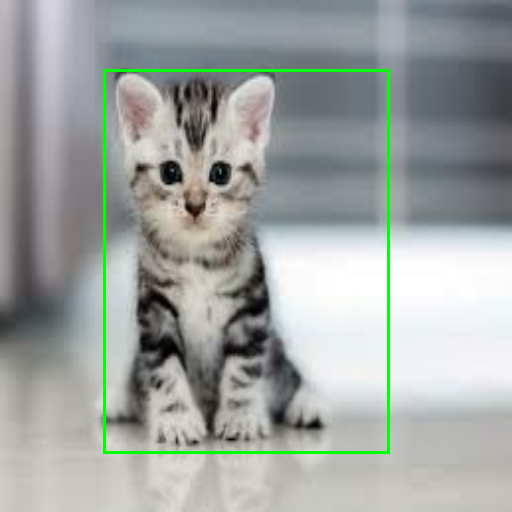

In [8]:
pil_image = Image.fromarray((image.numpy() * 255.).astype('uint8'))
draw = ImageDraw.Draw(pil_image)

print(labels)
for box in boxes:
    draw.rectangle(box, outline=(0, 255, 0), width=3)

pil_image